<a href="https://colab.research.google.com/github/svfrolov/YP-project/blob/main/%E2%84%9612_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2_%D1%82%D0%B0%D0%BA%D1%81%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h2>Описание проекта<span class="tocSkip"></span></h2
    >

* Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.
* Значение метрики RMSE на тестовой выборке должно быть не больше 48.

<h2>Инструкция по выполнению проекта<span class="tocSkip"></span></h2>

* Загрузите данные и выполните их ресемплирование по одному часу.
* Проанализируйте данные.
* Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
* Проверьте данные на тестовой выборке и сделайте выводы.

<h2>Описание данных<span class="tocSkip"></span></h2>

* Данные лежат в файле /datasets/taxi.csv. Скачать датасет. 
* Количество заказов находится в столбце 'num_orders' (от англ. number of orders, «число заказов»).

## Подготовка

In [ ]:
import pandas as pd; pd.set_option('display.max_columns', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

## Анализ

In [ ]:
data = pd.read_csv('/datasets/taxi.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.resample('1H').sum()
decomposed = seasonal_decompose(data)

In [ ]:
def general_info(data):
            
    print("Количество дублирующихся строк в датафрейме: {}".format(data.duplicated().sum()))
    print()

    print("Общее количество пропущенных значений:")
    display(data.isnull().sum())
    print()
   
    print("Общая информация о датафрейме:")
    display(data.info())
    print()    
    
    print("корреляционная матрица:")
    display(data.corr())
    print()    
    
    print("Статистические характеристики датафрейма:")
    display(data.describe())
    print()
    
    print("Первые 5 строк датафрейма:")
    display(data.head())

In [ ]:
general_info(data)

Количество дублирующихся строк в датафрейме: 4165

Общее количество пропущенных значений:


num_orders    0
dtype: int64


Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None


корреляционная матрица:


,num_orders
num_orders,1.0



Статистические характеристики датафрейма:


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000



Первые 5 строк датафрейма:


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


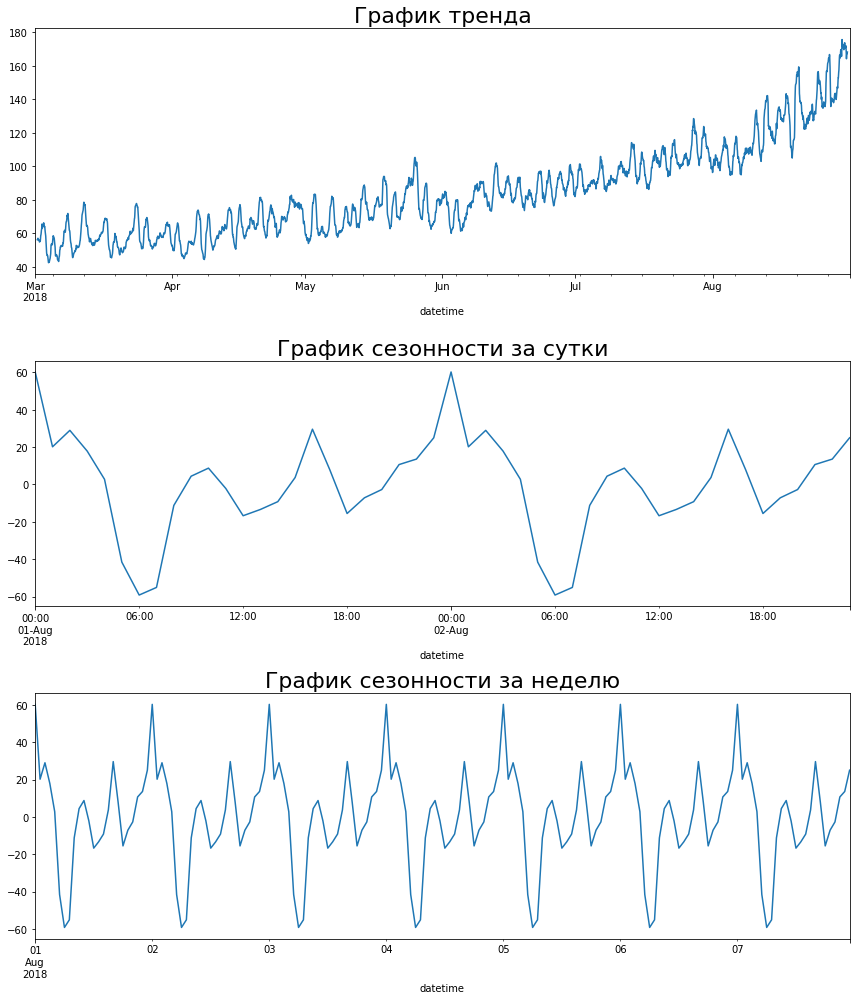

In [ ]:
plt.figure(figsize=(12, 14))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('График тренда', fontsize=22)
plt.subplot(312)
decomposed.seasonal['2018-08-01':'2018-08-02'].plot(ax=plt.gca())
plt.title('График сезонности за сутки', fontsize=22)
plt.subplot(313)
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(ax=plt.gca())
plt.title('График сезонности за неделю', fontsize=22); 
plt.tight_layout()

1. На первом графике "График тренда" мы видим общий рост количества заказов в течение всего периода времени, указанного на графике. Это может указывать на то, что бизнес развивается и растет.

2. На втором и третьем графике "График сезонности" мы видим повторяющийся цикл увеличения и уменьшения заказов с постоянным интервалом времени. Это может указывать на то, что у бизнеса есть сезонность, возможно, что спрос на его товары или услуги повышается в определенные периоды времени, например, перед праздниками или в выходные дни.
  * По графику "Сезонность за сутки" мы можем отметить пиковые активности. Минимальное число заказов приходится на 6 утра, максимальное на 12 ночи. Также высокое число заказов в вечернее время (4-5 часов вечера).
  * По графику "Сезонность за неделю" мы видим, что картина числа заказов не изменяется в зависимости от того будни это или выходные.

## Обучение

In [ ]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

In [ ]:
make_features(data, 24, 24)
train_size = int(0.9 * len(data))
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
make_features(data, 24, 24)
train_size = int(0.9 * len(data))
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]
X_train, y_train = train_data.drop('num_orders', axis=1), train_data['num_orders']
X_test, y_test = test_data.drop('num_orders', axis=1), test_data['num_orders']

In [ ]:
print(X_train.isnull().sum())

hour             0
dayofweek        0
rolling_mean    24
lag_1            1
lag_2            2
lag_3            3
lag_4            4
lag_5            5
lag_6            6
lag_7            7
lag_8            8
lag_9            9
lag_10          10
lag_11          11
lag_12          12
lag_13          13
lag_14          14
lag_15          15
lag_16          16
lag_17          17
lag_18          18
lag_19          19
lag_20          20
lag_21          21
lag_22          22
lag_23          23
lag_24          24
dtype: int64


In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
# Обучаем линейную регрессию
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Обучаем решающее дерево с подбором гиперпараметра
best_rmse_dt = float('inf')
for max_depth in range(1, 10):
    tscv = TimeSeriesSplit(n_splits=5)
    model_dt = DecisionTreeRegressor(random_state=12345, max_depth=max_depth)
    scores = cross_val_score(model_dt, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    mean_rmse = (-scores.mean())**0.5
    model_dt.fit(X_train, y_train)
    if mean_rmse < best_rmse_dt:
        best_rmse_dt = mean_rmse
        best_model_dt = model_dt

In [ ]:
# Обучаем градиентный бустинг с подбором гиперпараметров
best_rmse_gb = float('inf')
for n_estimators in range(10, 80, 10):
    for learning_rate in [0.01, 0.1, 1]:
        tscv = TimeSeriesSplit(n_splits=5)
        model_gb = GradientBoostingRegressor(random_state=12345, n_estimators=n_estimators, learning_rate=learning_rate)    
        scores = cross_val_score(model_gb, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
        mean_rmse_gb = (-scores.mean())**0.5
        model_gb.fit(X_train, y_train)
        if mean_rmse_gb < best_rmse_gb:
            best_rmse_gb = mean_rmse_gb
            best_model_gb = model_gb

In [ ]:
print('RMSE линейной регрессии:', mean_squared_error(y_train, model_lr.predict(X_train))**0.5)
print('RMSE решающего дерева:', best_rmse_dt)
print('RMSE градиентного бустинга:', best_rmse_gb)

RMSE линейной регрессии: 25.84754358096562
RMSE решающего дерева: 30.263439001321856
RMSE градиентного бустинга: 25.626111235911544


**Судя по значению RMSE, лучше всего проявила модель градиентного бустинга: RMSE=25.62**

## Тестирование

In [ ]:
print(X_test.isnull().sum())
X_test = X_test.fillna(X_test.mean())

hour            0
dayofweek       0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
lag_11          0
lag_12          0
lag_13          0
lag_14          0
lag_15          0
lag_16          0
lag_17          0
lag_18          0
lag_19          0
lag_20          0
lag_21          0
lag_22          0
lag_23          0
lag_24          0
dtype: int64


In [ ]:
print('RMSE градиентного бустинга на тестовой выборке:', mean_squared_error(y_test, best_model_gb.predict(X_test))**0.5)

RMSE градиентного бустинга на тестовой выборке: 44.326131286285275


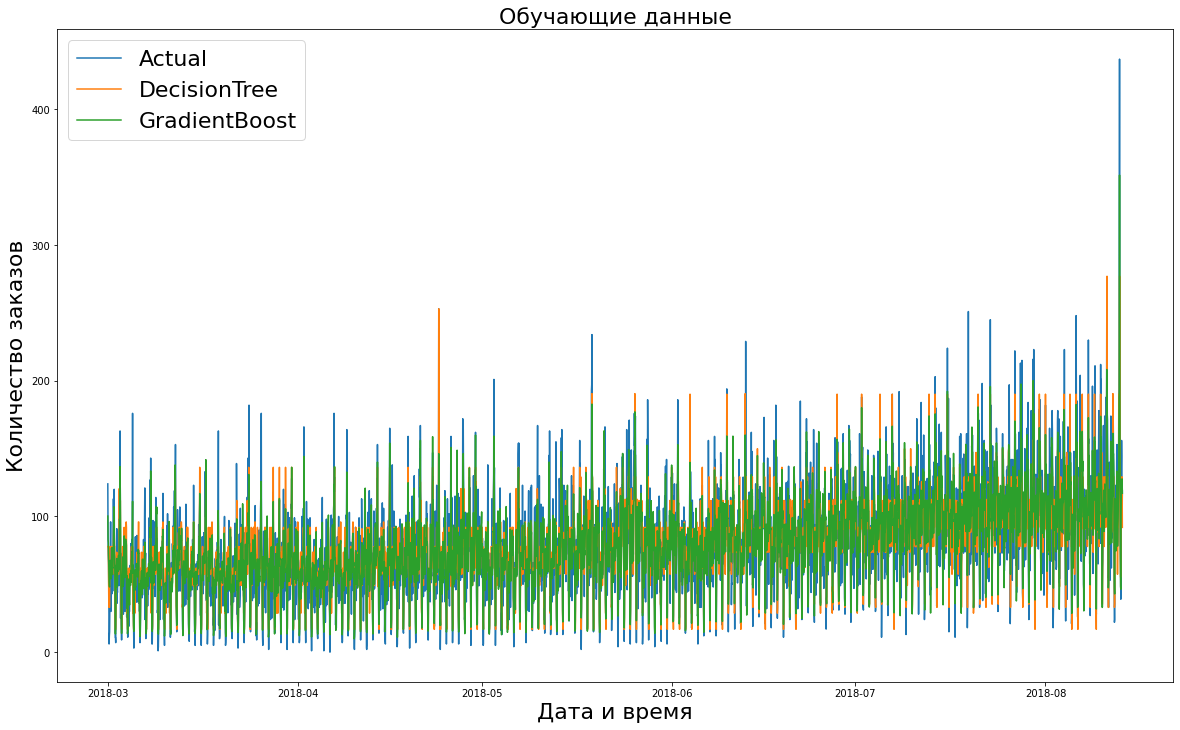

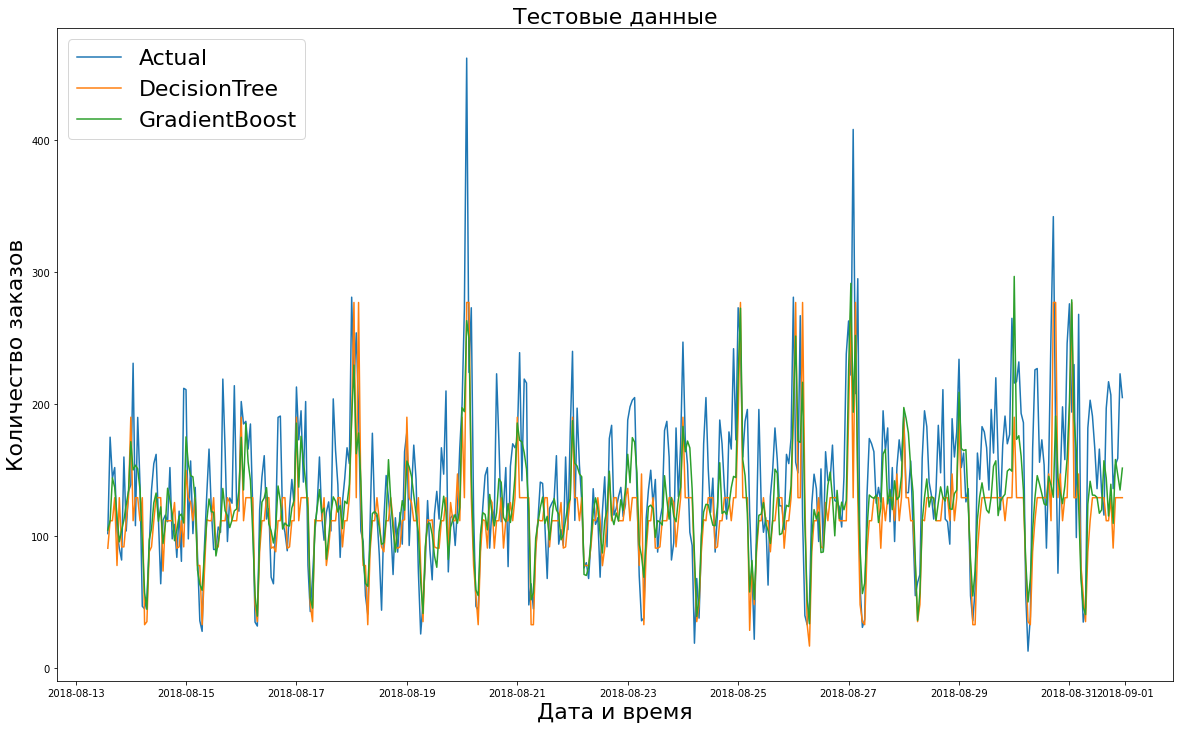

In [ ]:
# Графики для обучающих данных
plt.figure(figsize=(20,12))
plt.plot(train_data.index, train_data['num_orders'], label='Actual')
plt.plot(train_data.index, best_model_dt.predict(X_train), label='DecisionTree')
plt.plot(train_data.index, best_model_gb.predict(X_train), label='GradientBoost')
plt.title('Обучающие данные', fontsize=22)
plt.xlabel('Дата и время', fontsize=22)
plt.ylabel('Количество заказов', fontsize=22)
plt.legend(loc=2, prop={'size': 22})
plt.show()

# Графики для тестовых данных
plt.figure(figsize=(20,12))
plt.plot(test_data.index, test_data['num_orders'], label='Actual')
plt.plot(test_data.index, best_model_dt.predict(X_test), label='DecisionTree')
plt.plot(test_data.index, best_model_gb.predict(X_test), label='GradientBoost')
plt.title('Тестовые данные', fontsize=22)
plt.xlabel('Дата и время', fontsize=22)
plt.ylabel('Количество заказов', fontsize=22)
plt.legend(loc=2, prop={'size': 22})
plt.show()

## Вывод:

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные. 
* На первом графике "График тренда" мы видим общий рост количества заказов в течение всего периода времени, указанного на графике. Это может указывать на то, что бизнес развивается и растет.
* На втором графике "График сезонности" мы видим повторяющийся цикл увеличения и уменьшения заказов с постоянным интервалом времени. Это может указывать на то, что у бизнеса есть сезонность, возможно, что спрос на его товары или услуги повышается в определенные периоды времени, например, перед праздниками или в выходные дни.
  * По графику "Сезонность за сутки" мы можем отметить пиковые активности. Минимальное число заказов приходится на 6 утра, максимальное на 12 ночи. Также высокое число заказов в вечернее время (4-5 часов вечера).
  * По графику "Сезонность за неделю" мы видим, что картина числа заказов не изменяется в зависимости от того будни это или выходные.

3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.